Imoprting Library

In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Importing Dataset

In [325]:
df=pd.read_csv('Housing.csv')
# print(df)
df.describe()
#  displaying the 25th, 50th, and 75th percentiles for various columns.

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


creating training set

In [326]:
# x_train is the input variable ,feature
# y_train is the target
x_train=np.array(df.area)
y_train=np.array(df.price)
# print(f"x_train ={x_train}")
# print(f"y_train ={y_train}")

### Number of training examples `m`

In [327]:
# m is the number of training examples
#it shows size in every dimention and it returns a tuple.
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (545,)
Number of training examples is: 545


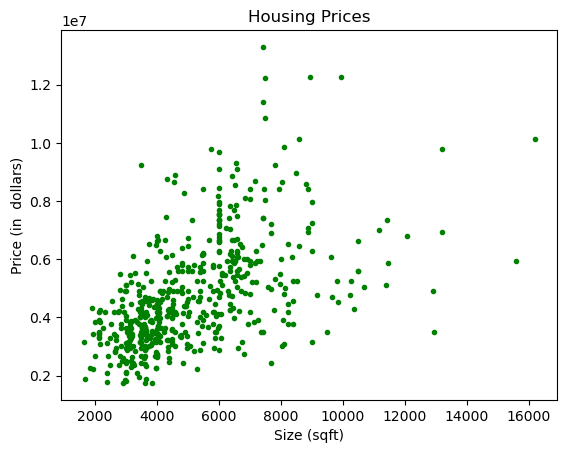

In [328]:
# Plot the data points
plt.scatter(x_train, y_train, marker='.', c='green')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in  dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

### NORMALIZE THE VALUES

In [329]:
for i in range(m):
    x_train[i]=(x_train[i]/1000)
    y_train[i]=(y_train[i]/10000)
    y_train=y_train.astype(float)
    x_train=x_train.astype(float)

    # print(x_train,y_train)

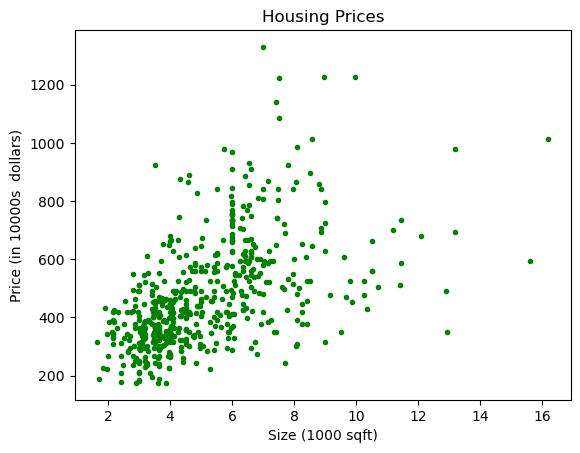

In [330]:
# Plot the data points
plt.scatter(x_train, y_train, marker='.', c='green')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 10000s  dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

### MODEL FUNCTION
Model: fw,b(x)=w.x+b

In [331]:
def our_model(w,b,x):
    """
    w=weight of our linear funtion
    b=model perameter
    x=intput variable or featurs
    f_wb=model prediction
    """
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb

### Here, we assumed values for weights (w) and bias (b).

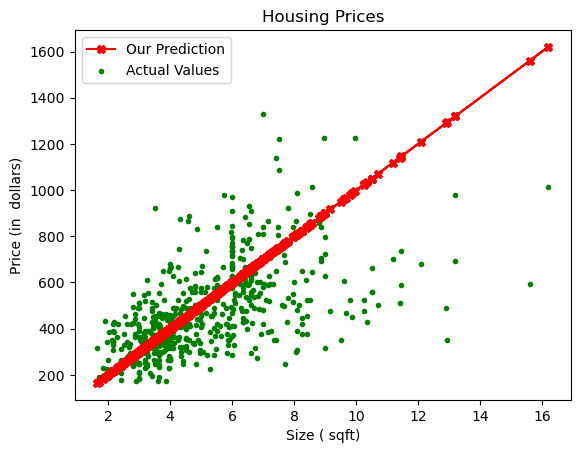

In [332]:
w=100
b=0
tmp_f_wb = our_model( w, b,x_train)
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, marker='X',c='r',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='.', c='g',label='Actual Values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in  dollars)')
# Set the x-axis label
plt.xlabel('Size ( sqft)')
plt.legend()
plt.show()

### Based on our model and our assumed weights (w) and bias (b), we predict a house price.

In [333]:
#based on our model and our asumed w and b ,we predict a house price
x_i=1200/1000
cost_1200sqft = w * x_i + b    
print(f"${cost_1200sqft:.0f} thousand  dollars")

$120 thousand  dollars


### Gradient Descent For Linear Regression
In this section we  use automate process of optimizing w and b

### Compute Cost 


In [334]:
def cost_function(x_train,y_train,w,b):
    all_cost_valus=0
    for i in range(m):
        f_wb=w*x_train[i]+b
        all_cost_valus+=(f_wb-y_train[i])**2
    return (all_cost_valus)/(2*m)
# print(cost_function(x_train,y_train,900,100),m)
# 1703998441092.2935

### COMPUTE GRADIENT

In [335]:
# def gradient(x_train,y_train,w,b):
#     dj_dw=0
#     dj_db=0
#     for i in range(m):
#         dj_dw+=((w*(x_train[i])+b-y_train[i])*x_train[i])
#         dj_db+=((w*x_train[i]+b-y_train[i]))
#     return dj_dw/m,dj_db/m
def gradient(x_train, y_train, w, b):
    m = len(y_train)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        dj_dw += ((w * x_train[i] + b - y_train[i]) * x_train[i])
        dj_db += (w * x_train[i] + b - y_train[i])
    return dj_dw / m, dj_db / m

### GRADIENT DESCENT ALGORITHM

In [336]:
def gradient_descent_algorithm(x_train,y_train,w_init,b_init,learning_rate,num_iters):
    parameter_history=[]
    cost_function_history=[]
    w=w_init
    b=b_init
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x_train, y_train, w, b)
        # print(dj_db,dj_db)
        b = b - learning_rate * dj_db
        w = w - learning_rate * dj_dw
        if i<100000:      # prevent resource exhaustion 
            cost_function_history.append( cost_function(x_train, y_train, w , b))
            parameter_history.append([w,b])
            # print(f"{cost_function_history[-1]} {parameter_history[-1]}")
            # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_function_history[-1]:0.2e} ",
            f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
            f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b,cost_function_history,parameter_history #return w and J,w history for graphing

In [337]:
# initialize parameters
w_init= 0
b_init = 0
# some gradient descent settings
iterations= 10000
rate=0.001
# run gradient descent
w_final, b_final, c_hist, p_hist = gradient_descent_algorithm(x_train ,y_train, w_init, b_init,rate, 
                                                    iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.24e+05  dj_dw: -2.671e+03, dj_db: -4.767e+02   w:  2.671e+00, b: 4.76673e-01
Iteration 1000: Cost 1.53e+04  dj_dw:  4.728e+00, dj_db: -2.853e+01   w:  7.836e+01, b: 4.45880e+01
Iteration 2000: Cost 1.46e+04  dj_dw:  4.084e+00, dj_db: -2.464e+01   w:  7.397e+01, b: 7.11237e+01
Iteration 3000: Cost 1.41e+04  dj_dw:  3.528e+00, dj_db: -2.128e+01   w:  7.017e+01, b: 9.40435e+01
Iteration 4000: Cost 1.37e+04  dj_dw:  3.047e+00, dj_db: -1.838e+01   w:  6.689e+01, b: 1.13840e+02
Iteration 5000: Cost 1.34e+04  dj_dw:  2.632e+00, dj_db: -1.588e+01   w:  6.405e+01, b: 1.30939e+02
Iteration 6000: Cost 1.31e+04  dj_dw:  2.273e+00, dj_db: -1.371e+01   w:  6.160e+01, b: 1.45709e+02
Iteration 7000: Cost 1.30e+04  dj_dw:  1.963e+00, dj_db: -1.185e+01   w:  5.949e+01, b: 1.58465e+02
Iteration 8000: Cost 1.28e+04  dj_dw:  1.696e+00, dj_db: -1.023e+01   w:  5.766e+01, b: 1.69484e+02
Iteration 9000: Cost 1.27e+04  dj_dw:  1.465e+00, dj_db: -8.838e+00   w:  5.609e+01, b: 1.79001e+02


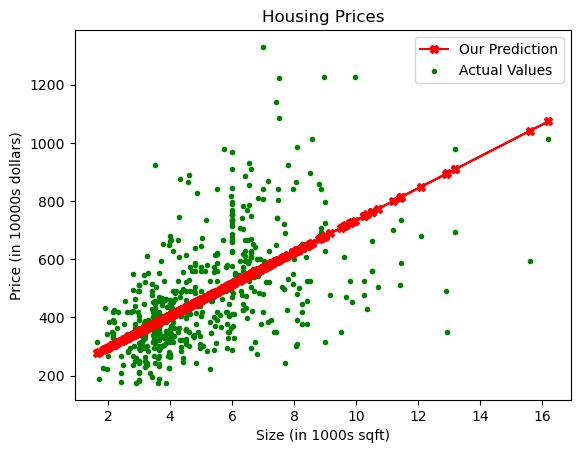

housing price for 1200 sqft $253 thousand  dollars


In [338]:
tmp_f_wb = our_model( w_final, b_final,x_train)
# Plot our model prediction
plt.plot(x_train, tmp_f_wb, marker='X',c='r',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='.', c='g',label='Actual Values')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 10000s dollars)')
# Set the x-axis label
plt.xlabel('Size (in 1000s sqft)')
plt.legend()
plt.show()
x_i=1200/1000
cost_1200sqft = w_final * x_i + b_final    
print(f"housing price for 1200 sqft ${cost_1200sqft:.0f} thousand  dollars")